In [1]:
print("Hello World!")

Hello World!


In [6]:
%pip install matplotlib

     |████████████████████████████████| 13.2MB 1.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
     |████████████████████████████████| 71kB 1.7MB/s eta 0:00:01
     |████████████████████████████████| 71kB 1.8MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [17]:
%pip install scipy

     |████████████████████████████████| 28.8MB 143kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


[[0. 0.]
 [0. 0.]
 [0. 0.]]

[[ 1.  2.]
 [ 9.  0.]
 [ 0. 12.]]


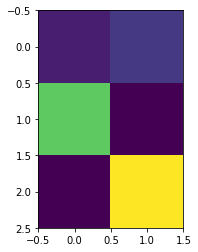

In [10]:
import numpy
import matplotlib as plt

a = numpy.zeros((3,2))
print(a, end="\n\n")

a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12
print(a)

plt.pyplot.imshow(a, interpolation="nearest")

In [59]:
import numpy
import scipy.special

class NeuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        # link weigh matrices, wih and who
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
        
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)), numpy.transpose(inputs))
        
        return final_outputs
    
    def query(self, inputs_list):
        # convert inputs_list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


In [22]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3
learning_rate = 0.3

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
n.query([1.0, 0.5, -1.5])

array([[0.43839936],
       [0.55331048],
       [0.65811649]])

In [13]:
import numpy

numpy.random.rand(3, 3)

array([[0.003066  , 0.61092867, 0.29625198],
       [0.02315253, 0.73480232, 0.62839136],
       [0.22843016, 0.15547578, 0.1667372 ]])

In [24]:
with open("makeyourownneuralnetwork/mnist_dataset/mnist_train_100.csv") as df:
    data_list = df.readlines()

print(len(data_list))

100


In [28]:
data_list[0].rstrip()

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


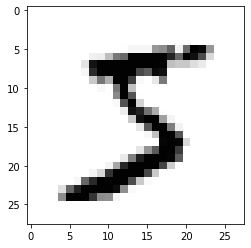

In [53]:
all_values = data_list[0].rstrip().split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
# print(image_array)
a = image_array[:]
print(a[-1,:])
plt.pyplot.imshow(a, cmap='Greys', interpolation='None')

In [56]:
# output nodes is 10
onodes = 10
targets = numpy.zeros(onodes) + 0.01
print(targets)
targets[int(all_values[0])] = 0.99
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


# Train the Neural Network with MNIST Dataset

In [62]:
# number of input, hidden and output nodes
input_nodes = 28 * 28
hidden_nodes = 100
output_nodes = 10

# learning rate
learning_rate = 0.3

# create a neural network
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# load the mnist training data CSV file into a list
with open("makeyourownneuralnetwork/mnist_dataset/mnist_train_100.csv") as df:
    training_data_list = df.readlines()


#############################
# train the neural network
#############################

# go through all records in the training data set
for record in training_data_list:
    all_values = record.rstrip().split(',')
    
    # scale and shift the inputs
    inputs = ((numpy.asfarray(all_values[1:]) / 255) * 0.99) + 0.01
    
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    outputs = n.train(inputs, targets)
    
    print(all_values[0], outputs.T, end='\n\n')


5 [[0.36360076 0.61448718 0.89073919 0.11190925 0.13507481 0.29467301
  0.53781994 0.41338355 0.96627121 0.25321611]]

0 [[0.11997215 0.03921475 0.03624904 0.10851334 0.69367443 0.9831834
  0.00538653 0.2636536  0.02679286 0.14332666]]

4 [[0.47246155 0.13252467 0.16369189 0.07525533 0.08726671 0.51578326
  0.08385574 0.16800755 0.58507625 0.10795586]]

1 [[0.32089276 0.03482575 0.04152518 0.0561627  0.29408774 0.28261172
  0.05368168 0.0739905  0.08537751 0.08410389]]

9 [[0.10470979 0.46791737 0.07108811 0.04364041 0.16012496 0.09577653
  0.04386844 0.04678899 0.02304619 0.04904928]]

2 [[0.08016132 0.02604653 0.02750669 0.0207382  0.04384998 0.16017636
  0.01907924 0.03626478 0.00706028 0.71252596]]

1 [[0.01391261 0.02167033 0.16684756 0.03335337 0.05753128 0.09794025
  0.01805036 0.04915473 0.02619021 0.20449397]]

3 [[0.01303359 0.10950583 0.29762658 0.02412131 0.07478647 0.04139865
  0.00471272 0.01581219 0.00237548 0.01431643]]

1 [[0.03770532 0.41239325 0.08504855 0.12373576 0

In [63]:
#############################
# Testing the neural network
#############################

# load the mnist test data CSV file into a list
with open("makeyourownneuralnetwork/mnist_dataset/mnist_test_10.csv") as df:
    test_data_list = df.readlines()

# get the first test record
all_values = test_data_list[0].rstrip().split(',')
print(all_values[0])

7


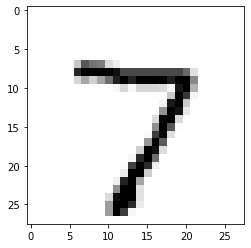

In [64]:
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
plt.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [65]:
n.query((numpy.asfarray(all_values[1:]) / 255) * 0.99 + 0.01)

array([[0.04174925],
       [0.00989351],
       [0.03484592],
       [0.10797015],
       [0.02097761],
       [0.02761321],
       [0.00237864],
       [0.88153795],
       [0.02041767],
       [0.01303105]])